## 二维Numpy数组

In [21]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])


In [22]:
# Change False to True for each block of code to see what it does

# Accessing elements
if True:
    print ridership[1, 3]
    print ridership[1:3, 3:5]
    print ridership[1, :]
    

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [23]:
# Vectorized operations on rows or columns
if True:
    print ridership[0, :] + ridership[1, :]
    print ridership[:, 0] + ridership[:, 1]
    

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [24]:
# Vectorized operations on entire arrays
if True:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print a + b


[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [25]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_station = ridership[0, :].argmax()
    
    mean_for_max = ridership[:, max_station].mean()
    
    overall_mean = ridership.mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

## 4. Numpy轴

In [26]:
import numpy as np

# Change False to True for this block of code to see what it does

# NumPy axis argument
if True:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print a.sum()
    print a.sum(axis=0)
    print a.sum(axis=1)
    
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    station_riders = ridership.mean(axis=0)
    
    max_daily_ridership = station_riders.max()
    min_daily_ridership = station_riders.min()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

45
[12 15 18]
[ 6 15 24]


(3239.9000000000001, 1071.2)

## Numpy和Pandas数据类型

In [27]:
import numpy as np

np.array([1, 2, 3, 4, 5]).dtype


dtype('int64')

In [28]:
enrollments = np.array([
    ['account_key', 'status', 'join_date', 'days_to_cancel', 'is_udacity'],
    [448, 'canceled', '2014-11-10', 65, True],
    [448, 'canceled', '2014-11-05', 5, True],
    [448, 'canceled', '2015-01-27', 0, True],
    [448, 'canceled', '2014-11-10', 0, True],
    [448, 'current', '2015-03-10', np.nan, True],
])


In [29]:
enrollments

array([['account_key', 'status', 'join_date', 'days_to_cancel',
        'is_udacity'],
       ['448', 'canceled', '2014-11-10', '65', 'True'],
       ['448', 'canceled', '2014-11-05', '5', 'True'],
       ['448', 'canceled', '2015-01-27', '0', 'True'],
       ['448', 'canceled', '2014-11-10', '0', 'True'],
       ['448', 'current', '2015-03-10', 'nan', 'True']],
      dtype='|S14')

In [30]:
enrollments[:3].mean()

# Then we can see the TypeError: "cannot perform reduce with flexible type"
# However Pandas can solve this problem using the DataFrame:
# A dataframe is also a 2D data structure, but each column is assumed to be a different type.


TypeError: cannot perform reduce with flexible type

In [31]:
import pandas as pd

enrollments_df = pd.DataFrame({
    'account_key': [448, 448, 448, 448, 448],
    'status': ['canceled', 'canceled', 'canceled', 'canceled', 'current'],
    'join_date': ['2014-11-10', '2014-11-05', '2015-01-27', '2014-11-10', '2015-03-10'],
    'days_to_cancel':[65, 5, 0, 0, np.nan],
    'is_udacity': [True, True, True, True, True]
})

In [32]:
enrollments_df

,account_key,days_to_cancel,is_udacity,join_date,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2015-03-10,current


In [33]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

In [34]:
enrollments_df.mean(axis=1)

0    171.333333
1    151.333333
2    149.666667
3    149.666667
4    224.500000
dtype: float64

## 6. 访问DataFrame元素

In [35]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [36]:
# ridership_df[0, :].argmax()  # Error
# ridership_df.iloc[0].argmax() # Deprecated

print ridership_df.iloc[0]
ridership_df.iloc[0].idxmax()

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64


'R006'

In [37]:
# Change False to True for each block of code to see what it does

# DataFrame creation
if True:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df_1

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print df_2
   

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [38]:
# Accessing elements
if True:
    print ridership_df.iloc[0]
    print '\n'
    
    print ridership_df.loc['05-05-11']
    print '\n'
    
    print ridership_df['R003']
    print '\n'
    
    print ridership_df.iloc[1, 3]
    print '\n'
    

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64


R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64


05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64


2328




In [39]:
# Accessing multiple rows
if True:
    print ridership_df.iloc[1:4]
    

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [40]:
# Accessing multiple columns
if True:
    print ridership_df[['R003', 'R005']]
    

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [41]:
# Pandas axis
if True:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df.sum()
    print df.sum(axis=1)
    print df.values.sum()
    

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [42]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_station = ridership.iloc[0].argmax()
    
    mean_for_max = ridership[max_station].mean()
    
    overall_mean = ridership.values.mean()

    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)


/Users/Dojo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  # Remove the CWD from sys.path while we load stuff.


(2342.5999999999999, 3239.9)

## 7. 将数据加载到DataFrame

In [43]:
# DataFrames are a great data structure to represent CSVs!

import pandas as pd

subway_df = pd.read_csv('nyc-subway-weather.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [44]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## 8. 计算相关性

In [45]:
import pandas as pd

filename = 'nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

entries = subway_df['ENTRIESn_hourly'] # 每个小时的入站人数
cum_entries = subway_df['ENTRIESn'] # 每个小时增加的乘坐总人数
rain = subway_df['meanprecipi'] # 当天的平均降水量
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)


0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


## 10. DataFrame向量化运算

In [46]:
import pandas as pd

# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print df1 + df2
    


    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [47]:
# Adding DataFrames with overlapping column names 
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print df1 + df2



    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [48]:
# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print df1 + df2



         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [49]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

entries_and_exits

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


### Pandas shift()
DataFrame.shift(periods=1, freq=None, axis=0)[source]
Shift index by desired number of periods with an optional time freq

Pandas shift() 函数的文档可以在[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)找到。如果你仍不确定函数的运行机制，请一边尝试一边了解！

### 另一种方法
还有一种方法是通过向量化运算，你还可以使用代码 return entries_and_exits.diff() 在单个步骤中计算答案。



In [50]:
entries_and_exits.shift(1)

,ENTRIESn,EXITSn
0,NaN,NaN
1,3144312.0,1088151.0
2,3144335.0,1088159.0
3,3144353.0,1088177.0
4,3144424.0,1088231.0
5,3144594.0,1088275.0
6,3144808.0,1088317.0
7,3144895.0,1088328.0
8,3144905.0,1088331.0
9,3144941.0,1088420.0


In [51]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## 11. DataFrame applymap()

In [52]:
import pandas as pd

# Change False to True for this block of code to see what it does

# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print df.applymap(add_one)
    


   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [53]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [54]:
    
def convert_grade(grade):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    elif grade >= 50:
        return 'E'
    else:
        return 'F'

IndentationError: expected an indented block (<ipython-input-54-61f5a242518b>, line 14)

In [55]:
convert_grade(79)

NameError: name 'convert_grade' is not defined

In [ ]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df)

## 12. DataFrame apply()

In [56]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    print ''
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]

        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [57]:
def standardize_column(column):
    return (column - column.mean()) / column.std()

standardize_column(grades_df['exam1'])



Andre     -2.196525
Barry      0.208891
Chris      0.018990
Dan       -0.170911
Emilio     0.715295
Fred      -0.487413
Greta      0.841896
Humbert   -0.803916
Ivan       1.284999
James      0.588694
Name: exam1, dtype: float64

In [58]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_column)

standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


注意：为使计算能够正确进行，我们应该在 .std() 函数中将“ddof”参数的值设置为 0。

注意，计算得出的默认标准偏差类型在 numpy 的 .std() 和 pandas 的 .std() 函数之间是不同的。
默认情况下，numpy 计算的是总体标准偏差，ddof = 0。
另一方面，pandas 计算的是样本标准偏差，ddof = 1。
如果我们知道所有的分数，那么我们就有了总体——因此，要使用 pandas 进行归一化处理，我们需要将“ddof”设置为 0。

## 13. DataFrame apply() 使用案例2

In [59]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print df.apply(np.mean)
    print df.apply(np.max)



a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [60]:

def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_in_column)

second_largest(df)

a     4
b    40
c    20
dtype: int64

## 14. 向Series添加DataFrame

In [61]:
import pandas as pd

# Change True to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s
    

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [62]:
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s



    0   1   2   3
0  10  20  30  40

0    1
1    2
2    3
3    4
dtype: int64

    0   1   2   3
0  11  22  33  44


In [63]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s
    

    0
0  10
1  20
2  30
3  40

0    1
1    2
2    3
3    4
dtype: int64

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [64]:
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s
    


    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

a    1
b    2
c    3
d    4
dtype: int64

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [65]:
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

0    1
1    2
2    3
3    4
dtype: int64

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


## 15. 再次归一化每一列

### 15.1 练习

In [66]:
import pandas as pd

# Adding using +
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df + s
    


    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [67]:
# Adding with axis='index'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df.add(s, axis='index')
    # The functions sub(), mul(), and div() work similarly to add()
    

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [68]:
# Adding with axis='columns'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print ''
    print s
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()


    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

0    1
1    2
2    3
3    4
dtype: int64

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [69]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


### 15.2 Stadardize 

In [70]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean()) / df.std()

standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [71]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [72]:
grades_df.mean()

exam1    77.7
exam2    57.4
dtype: float64

In [73]:
grades_diffs = grades_df - grades_df.mean()
grades_diffs

,exam1,exam2
Andre,-34.7,-33.4
Barry,3.3,5.6
Chris,0.3,-1.4
Dan,-2.7,-1.4
Emilio,11.3,9.6
Fred,-7.7,-6.4
Greta,13.3,21.6
Humbert,-12.7,-11.4
Ivan,20.3,14.6
James,9.3,2.6


In [74]:
grades_std = grades_diffs / grades_df.std()
grades_std

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


### 15.3 Standardize(rows)

In [75]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    columns_mean = grades_df.mean(axis='columns')
    mean_diffs = grades_df.sub(columns_mean, axis='index')
    columns_std = grades_df.std(axis='columns')
    return mean_diffs.div(columns_std, axis='index')

standardize_rows(grades_df)

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


In [76]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [77]:
columns_mean = grades_df.mean(axis='columns')
columns_mean

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [78]:
mean_diffs = grades_df.sub(columns_mean, axis='index')
mean_diffs

,exam1,exam2
Andre,9.5,-9.5
Barry,9.0,-9.0
Chris,11.0,-11.0
Dan,9.5,-9.5
Emilio,11.0,-11.0
Fred,9.5,-9.5
Greta,6.0,-6.0
Humbert,9.5,-9.5
Ivan,13.0,-13.0
James,13.5,-13.5


In [79]:
columns_std = grades_df.std(axis='columns')
columns_std


Andre      13.435029
Barry      12.727922
Chris      15.556349
Dan        13.435029
Emilio     15.556349
Fred       13.435029
Greta       8.485281
Humbert    13.435029
Ivan       18.384776
James      19.091883
dtype: float64

In [80]:
mean_diffs.div(columns_std, axis='index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


## 16. Pandas groupby()

### 16.1 练习

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change True to True for each block of code to see what it does

# Examine DataFrame
if True:
    print example_df
    


   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4


In [82]:
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups
    

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [83]:
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups
    

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [84]:
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()
    

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [85]:
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


In [86]:
filename = 'nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)

subway_df.head()
### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [87]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

Populating the interactive namespace from numpy and matplotlib


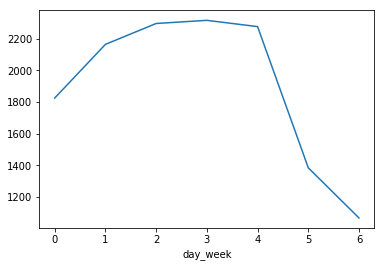

In [88]:
%pylab inline
import seaborn as sns

ridership_by_day.plot()

## 17. 每小时入站和出站数  

使用 groupby() 计算每小时入站和出站数
你在之前的测试题中，是对累计入站数的单一集合计算每小时入站和出站数。然而，在原始数据中，每个站台都有一个单独的数量集。

因此，要准确计算每小时入站和出站数，有必要按每天每站台进行分组，然后计算每天每小时入站和出站数。

写下能够完成此操作的一个函数。你应该使用 apply() 函数来调用你之前写的函数。你还应该确保将分组数据限制在入站和出站两列中，因为如果你的函数是在非数值型数据类型上被调用，那么它有可能会造成错误。

如果你希望了解在 Pandas 中使用 groupby() 函数的更多信息，可以访问[此页面](http://pandas.pydata.org/pandas-docs/stable/groupby.html)。

注意：你将无法使用此方法，在完整数据集中重新生成 ENTRIESn_hourly 和 EXITSn_hourly 列。在创建数据集时，我们做了额外的处理，删除了错误值。

### 17.1 练习

In [89]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if True:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(standardize)
    

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [92]:
# Find second largest value in each group
if True:
    def second_largest(xs):
        sorted_xs = xs.sort_values(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(second_largest)



even
False    1
True     4
Name: value, dtype: int64


In [93]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

ridership_df


,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [96]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    hourly_entries_and_exits = entries_and_exits.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)
    return hourly_entries_and_exits

get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


## 18. 合并Pandas DataFrame

In [98]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

subway_df


,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135


In [108]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

weather_df


,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
5,05-03-11,0,0,40.691320,-73.867135,30.14,0,54.0,3.5
6,05-04-11,0,0,40.689945,-73.872564,29.98,0,57.2,15.0
7,05-04-11,0,0,40.691320,-73.867135,29.98,0,57.2,15.0
8,05-05-11,0,0,40.689945,-73.872564,30.01,0,48.9,15.0
9,05-05-11,0,0,40.691320,-73.867135,30.01,0,48.9,15.0


In [101]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return None

In [106]:
subway_df.merge(weather_df,
                on=['DATEn', 'hour', 'latitude', 'longitude'],
                how='inner')

# subway_df.merge(weather_df,
#                 left_on=['DATEn', 'hour', 'latitude', 'longitude'],
#                 right_on=['date', 'hour', 'latitude', 'longitude'],
#                 how='inner')


,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


## 19. 使用DataFrame绘制图形  

DataFrame 也像 Pandas Series 一样拥有 plot() 方法。如果 **df** 是 DataFrame，那么 **df.plot()** 将生成线条图，其中不同颜色的每条线代表 DataFrame 中的一个变量。这种方法能使你方便快速地查看数据，特别是对于小型 DataFrame 而言，但是对于更复杂的图形，你通常会希望直接使用 matplotlib。

在接下来的测试题中，根据纽约地铁数据创建你的图形，展现数据有趣的一面。例如，你可能会创建：

- 雨天和晴天地铁客流量直方图。以经纬度作为 x 和 y 轴、客流量作为气泡大小的地铁站散点图。
  - 如果你选择此选项，你可能希望对 groupby() 使用 as_index=False 参数。以下测试题中有示例代码。
- 以地铁客流量作为一个轴、降雨量或温度作为另一个轴的散点图。

如果你不确定如何绘制出想要的图形，尝试在 Google 上进行搜索，或者查看 [matplotlib 文档](http://matplotlib.org/api/pyplot_api.html)。一旦你绘制出满意的图形，请分享至论坛！


In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [118]:
# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print first_even
#     print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame
    

       above_three  value
even                     
False        False      1
True         False      2


In [113]:
# groupby() with as_index=False
if True:
    first_even = example_df.groupby('even', as_index=False).first()
    print first_even
    print first_even['even'] # Now 'even' is still a column in the DataFrame



    even  above_three  value
0  False        False      1
1   True        False      2
0    False
1     True
Name: even, dtype: bool


In [121]:
filename = 'nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)

subway_df.head(5)
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [126]:
data_by_location = subway_df.groupby(['latitude', 'longitude'],
                                    as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [127]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

Populating the interactive namespace from numpy and matplotlib


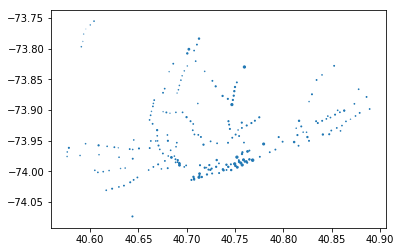

In [132]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

# 根据客流量设置点的大小
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                  data_by_location['ENTRIESn_hourly'].std())

# print scaled_entries

plt.scatter(data_by_location['latitude'], 
            data_by_location['longitude'],
            s=scaled_entries)

## 20. 三维数据  

### 20.1 三维（3D）数据
你已经处理过一维和二维数据，你可能想知道如何处理三维以上的数据。

### 20.2 NumPy 的 3D 数据
NumPy 数组可以具有任意多的维度。就像你可以从列表中创建 1D 数组，从列表的列表中创建 2D 数组一样，你可以从列表的列表的列表中创建 3D 数组，以此类推。例如，以下代码将创建 3D 数组：

a = np.array([  
    [['A1a', 'A1b', A1c'], ['A2a', 'A2b', 'A2c']],  
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]  
])  


### 20.3 Pandas 的 3D 数据
Pandas 有一个叫作 Panel 的数据结构，类似 DataFrame 或 Series，只不过用于 3D 数据。如果你有兴趣，可以在这里了解 [Panels](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel)。